# **CUSTOMER CHUN ANALYSIS**
<p><h4>Here is a telecommunication company that includes customer information such as demographics, usage patterns churned or not churned.</h4></p>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## **CLEANING AND PREPROCESSING**

<p><i><h4>This process involves importing necessary libraries for analysis and modelling, loading the required dataset. Going further to check for dataset properties, size of dataset, statistical summary, examining the dataset for missing values, duplicates; handling and treating outliers.</h4></i></p>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn

In [2]:
#Now, let's load our dataset and view the first 10 observations
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#Let's determine the size of the dataset in the format (row, column)
telcom.shape

(7043, 21)

In [4]:
#It is observed that there are 7043 rows and 21 columns
#Let us view the properties of the dataset
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Let us view the statistical summary of each numerical feature
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#Examine the columns within the dataset
telcom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#Let's check for missing values within the dataset
telcom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<p><i><h5>It is observed that there are no missing values within the dataset. Hence, let us check for outliers using a box plot and check for duplicates.</h5></i></p>

### *OUTLIERS*
<p><h4>An important step in data cleaning and preprocessing is detecting and fixing outliers in a dataset, as that will negatively affect the statistical analysis and output a low accuracy of a model.
<br></br>
An Outlier is an observation that differs significantly, either an extremely high or low data pount relative to the nearest data point, that rests on the neighbouring existing values in a dataset.
</h4></p>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<Axes: >

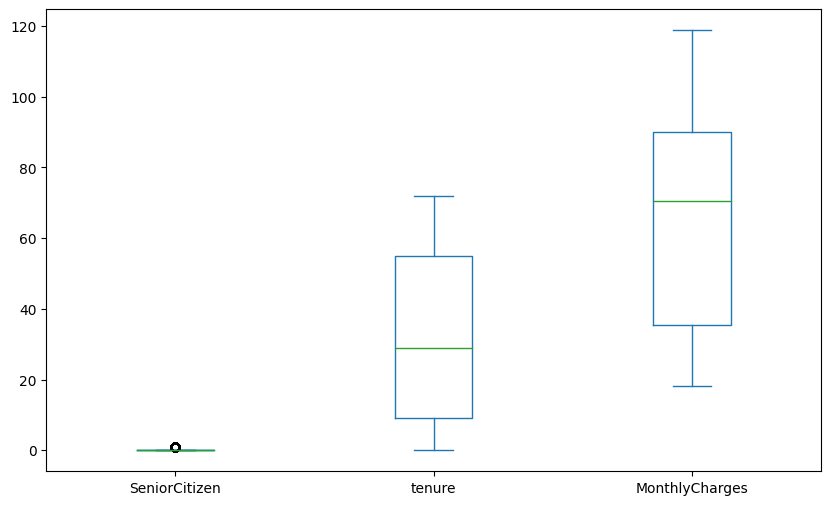

In [8]:
telcom.plot(kind = 'box', vert = True, figsize = (10, 6))

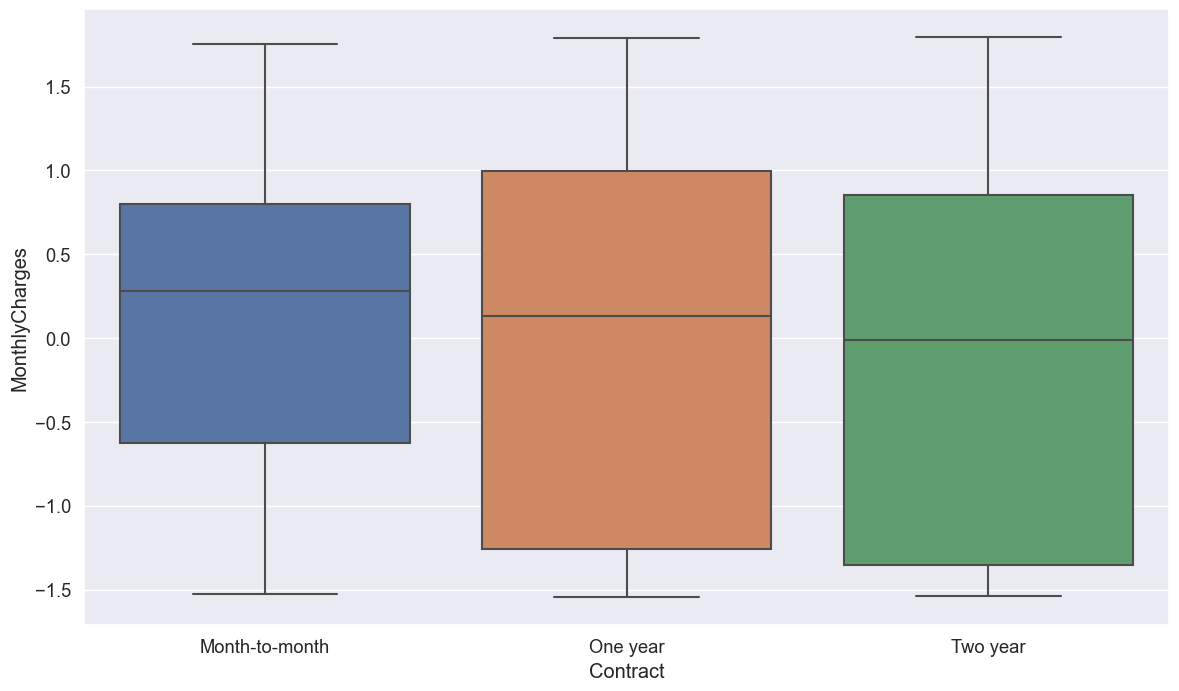

In [54]:
fig = plt.subplots(figsize = (14, 8))
sns.set(style = 'darkgrid')
ax = sns.boxplot(x = telcom['Contract'], y = telcom['MonthlyCharges'])

In [10]:
#Here is an interactive boxplot showing the contract by monthly charges
#It is observed that there are no outliers
fig = px.box(telcom, x='Contract', y='MonthlyCharges')
fig.show()

In [11]:
#Checking the numerical attributes for outlier (noise)
outlier_check = telcom[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
outlier_check.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [12]:
#First quartile 
Q1 = outlier_check.quantile(0.25)
#Second quartile
Q3 = outlier_check.quantile(0.75)
#Interquartile range
IQR = Q3 - Q1
print(IQR, Q3, Q1)

SeniorCitizen      0.00
tenure            46.00
MonthlyCharges    54.35
dtype: float64 SeniorCitizen      0.00
tenure            55.00
MonthlyCharges    89.85
Name: 0.75, dtype: float64 SeniorCitizen      0.0
tenure             9.0
MonthlyCharges    35.5
Name: 0.25, dtype: float64


In [13]:
#Upperbound of the quartile
print((Q3 + 1.5 * IQR))

SeniorCitizen       0.000
tenure            124.000
MonthlyCharges    171.375
dtype: float64


In [14]:
#Lowerbound of the quartile
print(Q1 - 1.5 * IQR)

SeniorCitizen      0.000
tenure           -60.000
MonthlyCharges   -46.025
dtype: float64


In [15]:
#Defining  function to determine the total outliers
def total_outliers(X, Y):
    c = 0
    for i in X:
        if i > Y:
            c +=1
    print(c)


In [16]:
total_outliers(outlier_check.tenure, 124)

0


In [17]:
total_outliers(outlier_check.MonthlyCharges, 171.375)

0


<p><i><h4>In summary, after reviewing our numerical values, it is observed that there are no outliers, therefore, the dataset is good enough to calculate the mean.</h4></i></p>

<Axes: ylabel='Density'>

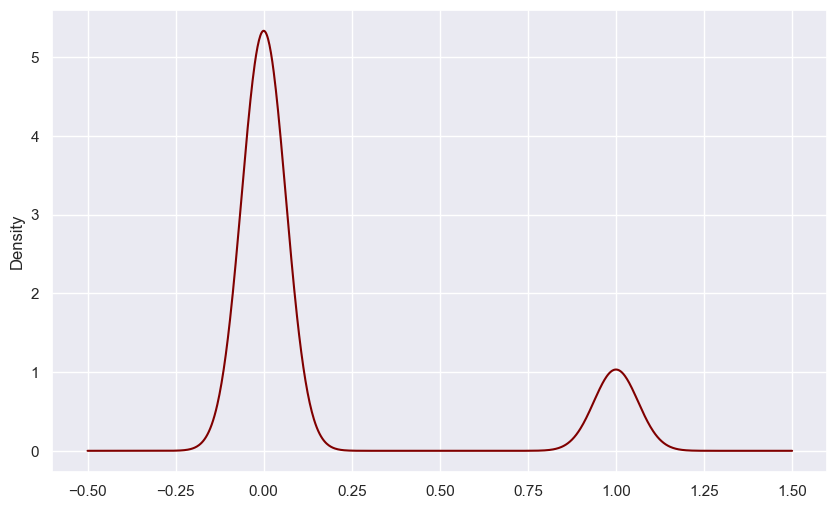

In [18]:
telcom['SeniorCitizen'].plot(kind = 'density', figsize = (10,6), color = 'maroon')

<Axes: title={'center': 'Distribution of Tenure'}, ylabel='Density'>

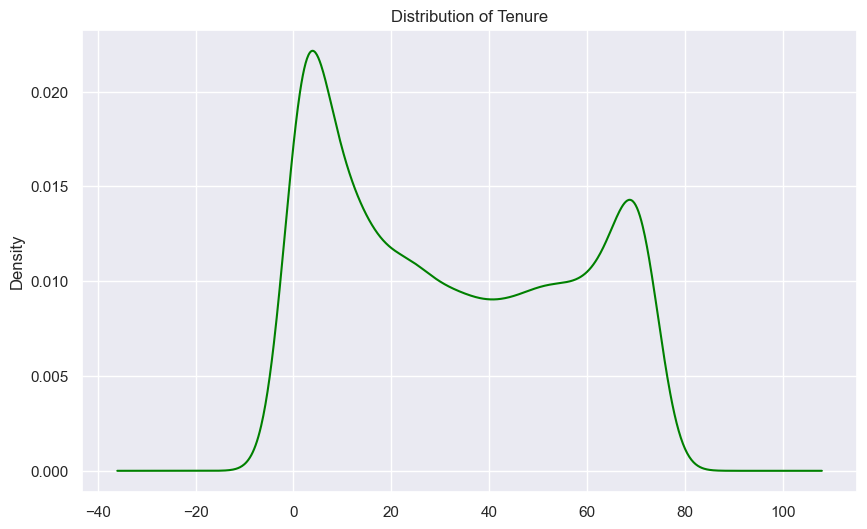

In [19]:
telcom['tenure'].plot(kind = 'density', figsize = (10,6), color = 'green', title='Distribution of Tenure')

<Axes: title={'center': 'Distribution of Monthly Charges'}, ylabel='Density'>

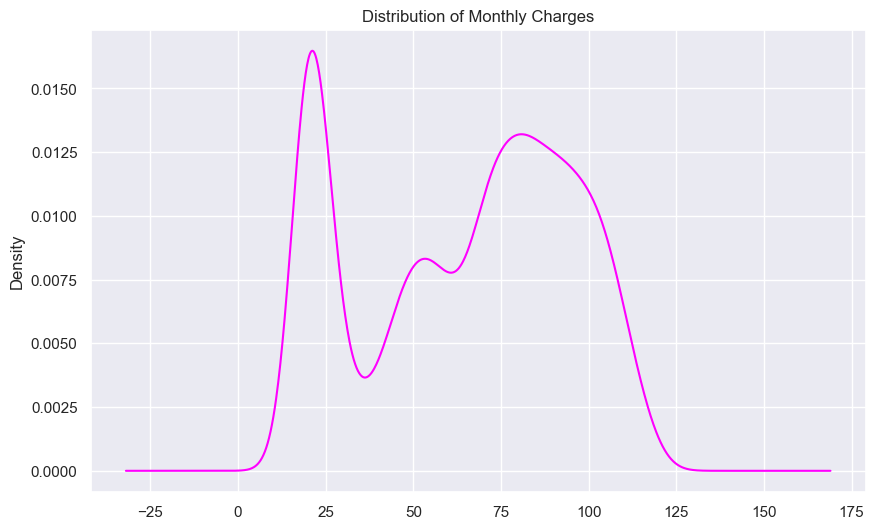

In [20]:
telcom['MonthlyCharges'].plot(kind = 'density', figsize = (10,6), color = 'magenta', title='Distribution of Monthly Charges')

In [21]:
try:
    telcom['TotalCharges'] = telcom['TotalCharges'].astype(float)
except ValueError:
    print('Conversion failed: Not a valid float.')

Conversion failed: Not a valid float.


### *DUPLICATED VALUES*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [22]:
#Now, let's check for duplicte values
telcom.duplicated().sum()

0

<p><i>To further the analysis, unnecessary columns will be dropped</i><p>

In [23]:
#Drop insignificant features
telcom.drop(columns = 'customerID', inplace = True)
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **DATA MODELLING WITH MACHINE LEARNING**

<p><i><h4>In this section, we shall carry out data modelling with the use of machine learning libraries e.g <code>scikit-learn</code> and <code>scipy</code>. One Hot Encoding, Scaling numeric features using preprocessing functions. and Hypothesis Testing (t-test)</h4></i></p>
<p><br>
Now, let's get at it. 💪
</br></p>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### *One Hot Encoding*

<p><i>We shall model our dataset by creating dummy variables with a pipeline.</i></p>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
ohe = OneHotEncoder()

In [26]:
#telcom_enc = telcom.replace({'gender': {'Male': 1, 'Female': 0}})
#telecom_enc['gender'] = telcom['gender'].map({'Male': 1, 'Female': 0})
target = telcom['gender'].map({'Male': 1, 'Female': 0})
X = ohe.fit_transform(np.array(telcom[['gender']]).reshape(-1,1))
y = np.array(target)
print(X, y)


  (0, 0)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (7018, 1)	1.0
  (7019, 0)	1.0
  (7020, 1)	1.0
  (7021, 1)	1.0
  (7022, 1)	1.0
  (7023, 0)	1.0
  (7024, 1)	1.0
  (7025, 0)	1.0
  (7026, 0)	1.0
  (7027, 1)	1.0
  (7028, 0)	1.0
  (7029, 0)	1.0
  (7030, 0)	1.0
  (7031, 1)	1.0
  (7032, 1)	1.0
  (7033, 1)	1.0
  (7034, 0)	1.0
  (7035, 1)	1.0
  (7036, 0)	1.0
  (7037, 0)	1.0
  (7038, 1)	1.0
  (7039, 0)	1.0
  (7040, 0)	1.0
  (7041, 1)	1.0
  (7042, 1)	1.0 [0 1 1 ... 0 1 1]


### *NORMALISE OR SCALE NUMERIC FEATURES*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [27]:
#Scale the numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

telcom[['tenure', 'MonthlyCharges']] = scaler.fit_transform(telcom[['tenure', 'MonthlyCharges']])
display(telcom[['tenure', 'MonthlyCharges']])

,tenure,MonthlyCharges
0,-1.277445,-1.160323
1,0.066327,-0.259629
2,-1.236724,-0.362660
3,0.514251,-0.746535
4,-1.236724,0.197365
...,...,...
7038,-0.340876,0.665992
7039,1.613701,1.277533
7040,-0.870241,-1.168632
7041,-1.155283,0.320338


In [28]:
#First, let's check for labels for each Categorical variables
for col in telcom.columns:
    print(col, ': ', len(telcom[col].unique()), 'labels')

gender :  2 labels
SeniorCitizen :  2 labels
Partner :  2 labels
Dependents :  2 labels
tenure :  73 labels
PhoneService :  2 labels
MultipleLines :  3 labels
InternetService :  3 labels
OnlineSecurity :  3 labels
OnlineBackup :  3 labels
DeviceProtection :  3 labels
TechSupport :  3 labels
StreamingTV :  3 labels
StreamingMovies :  3 labels
Contract :  3 labels
PaperlessBilling :  2 labels
PaymentMethod :  4 labels
MonthlyCharges :  1585 labels
TotalCharges :  6531 labels
Churn :  2 labels


### *CORRELATION*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [29]:
#Install the two methods from heatmap library
from heatmap import heatmap, corrplot

In [30]:
sns.set(color_codes=True, font_scale=1.2)

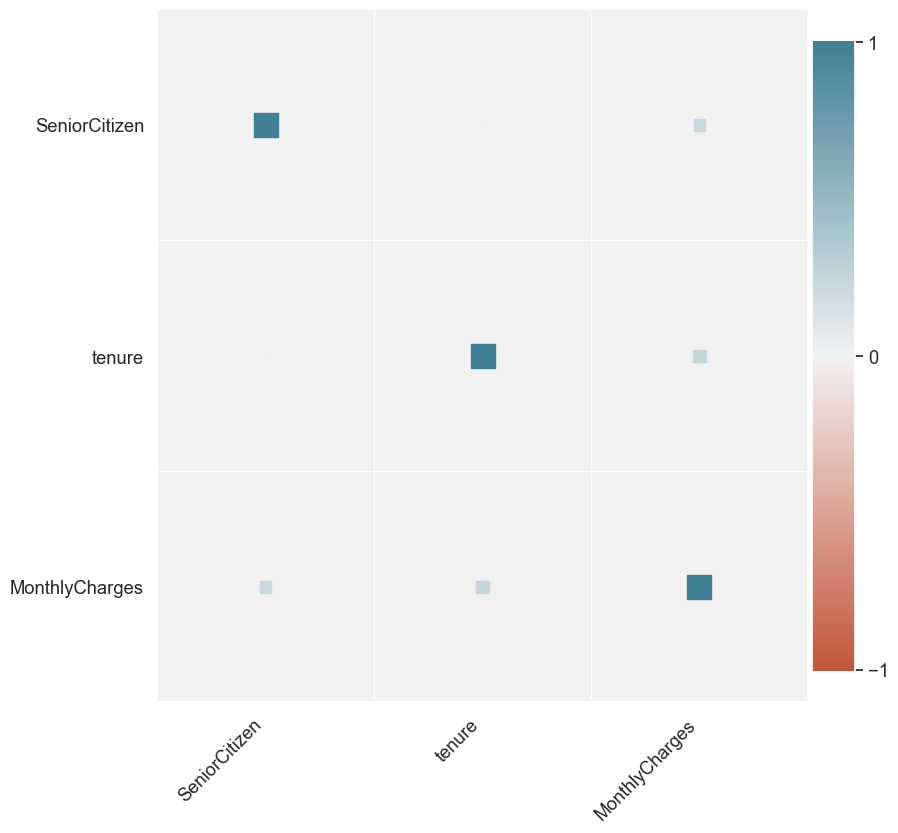

In [31]:
plt.figure(figsize=(9,9))
corrplot(telcom[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr(), size_scale=300);

In [32]:
corr = telcom[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr()
display(corr)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


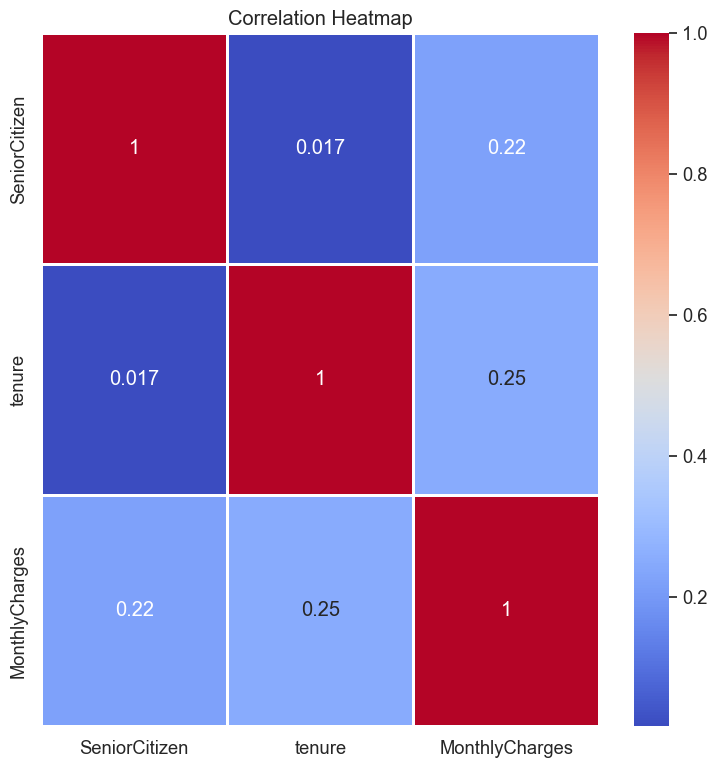

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1).set(title = 'Correlation Heatmap')
plt.show()

In [34]:
fig = px.imshow(corr, text_auto=True, title='Correlation Heatmap')
fig.show()

## **VISUALISATION**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [35]:
counts = telcom['gender'].value_counts()
print(counts)

gender
Male      3555
Female    3488
Name: count, dtype: int64


### *DISTRIBUTION OF NUMERIC VARIABLES*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

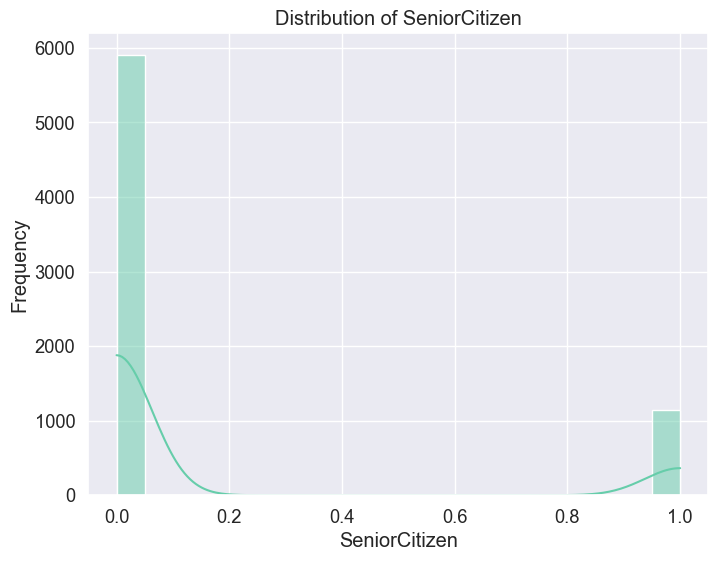

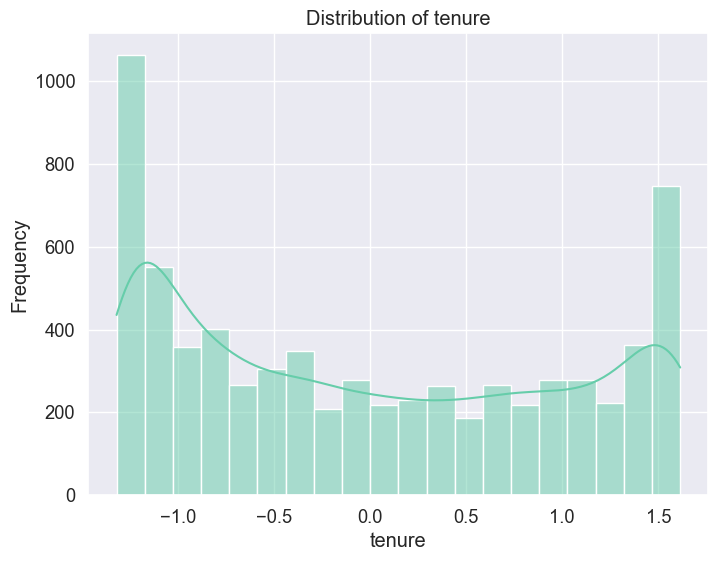

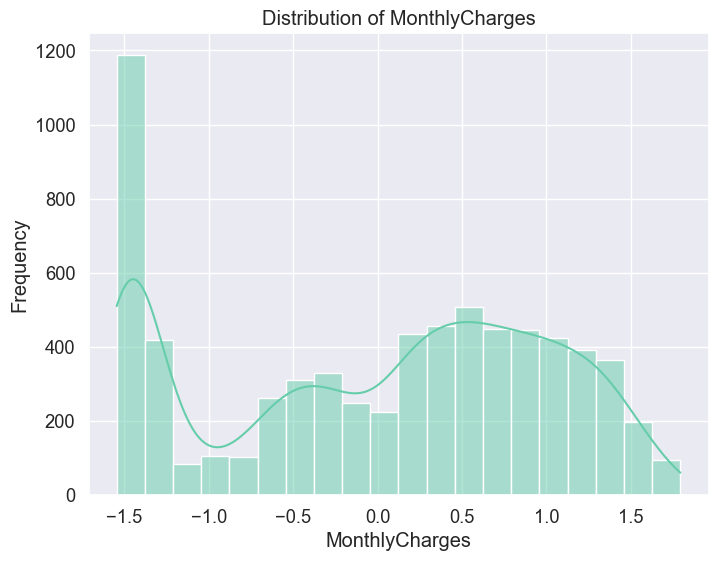

In [36]:
numeric = telcom.select_dtypes(include=['float64', 'int64']).columns

for values in numeric:
    plt.figure(figsize=(8, 6))
    
    #Distribution plot consisting of bar and dendity plots
    sns.histplot(telcom[values], kde=True, bins=20, color='mediumaquamarine')
    
    # Set labels and title
    plt.xlabel(values)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {values}')
    
    plt.show()

### *HYPOTHESIS TESTING*

<p><i><h4>Hypothesis testing is a statistical method used to make inferences about population parameters based on a sample of data.</h4></i></p>

<p><i><h5>We shall carry Hypotheis testing using T-test on the Churn feature to determine between churned and non-churned customers.</h5></i></p>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [37]:
from scipy import stats

In [38]:
telcom['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [39]:
#Churned customers
churn = telcom[telcom['Churn'] == 'Yes']['MonthlyCharges']
#Non-churned customers
non_churn = telcom[telcom['Churn'] == 'No']['MonthlyCharges']

#Perform a two sample t-test (assuming unequal variances)
t_statistic, p_value = stats.ttest_ind(churn, non_churn, equal_var=False)

#Print the t-statistic and p-value
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

#Define the significance level (alpha)
alpha = 0.05

#Compare the p-value to alpha and make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between churned and non-churned customers.")

t-statistic: 18.407526676414676
p-value: 8.59244933154656e-73
Reject the null hypothesis. There is a significant difference between churned and non-churned customers.


### *SUMMARY TABLE*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [40]:
#Create summary tables and statistics for various customer segments (e.g., by contract type, payment method).
summary_table = telcom.groupby('Contract').agg({
    'MonthlyCharges': ['count', 'mean', 'std', 'median'],
    'tenure': ['count', 'mean', 'std', 'median']
}).reset_index()

#Rename the columns for clarity
summary_table.columns = ['Category',
                         'MonthlyCharges_Count', 'MonthlyCharges_Mean', 'MonthlyCharges_Std', 'MonthlyCharges_Median',
                         'Tenure', 'Tenure_Mean', 'Tenure_Std', 'Tenure_Median'
                         ]

#Display the Summary Table
print('Summary based on Contract\n')
display(summary_table)

Summary based on Contract



,Category,MonthlyCharges_Count,MonthlyCharges_Mean,MonthlyCharges_Std,MonthlyCharges_Median,Tenure,Tenure_Mean,Tenure_Std,Tenure_Median
0,Month-to-month,3875,0.054401,0.894931,0.282117,3875,-0.583706,0.720305,-0.829521
1,One year,1473,0.009536,1.058250,0.132555,1473,0.393915,0.775148,0.473531
2,Two year,1695,-0.132654,1.152585,-0.013683,1695,0.992109,0.741492,1.287938


In [41]:
#Create summary tables and statistics for various customer segments (e.g., by contract type, payment method).
summary_table = telcom.groupby('PaymentMethod').agg({
    'MonthlyCharges': ['count', 'mean', 'std', 'median'],
    'tenure': ['count', 'mean', 'std', 'median']
}).reset_index()

#Rename the columns for clarity
summary_table.columns = ['Category',
                         'MonthlyCharges_Count', 'MonthlyCharges_Mean', 'MonthlyCharges_Std', 'MonthlyCharges_Median',
                         'Tenure', 'Tenure_Mean', 'Tenure_Std', 'Tenure_Median'
                         ]

#Display the Summary Table
print('Summary based on Payment Method\n')
display(summary_table)

Summary based on Payment Method



,Category,MonthlyCharges_Count,MonthlyCharges_Mean,MonthlyCharges_Std,MonthlyCharges_Median,Tenure,Tenure_Mean,Tenure_Std,Tenure_Median
0,Bank transfer (automatic),1544,0.080795,1.015531,0.277131,1544,0.459553,0.944627,0.636413
1,Credit card (automatic),1522,0.058186,1.017433,0.274639,1522,0.443780,0.950396,0.595692
2,Electronic check,2365,0.382018,0.799446,0.524739,2365,-0.293045,0.911415,-0.585198
3,Mailed check,1612,-0.692791,0.874593,-0.999129,1612,-0.429238,0.864020,-0.707359


In [42]:
telcom_count = telcom.groupby(by=['Churn']).size().reset_index(name='Counts')
display(telcom_count)

,Churn,Counts
0,No,5174
1,Yes,1869


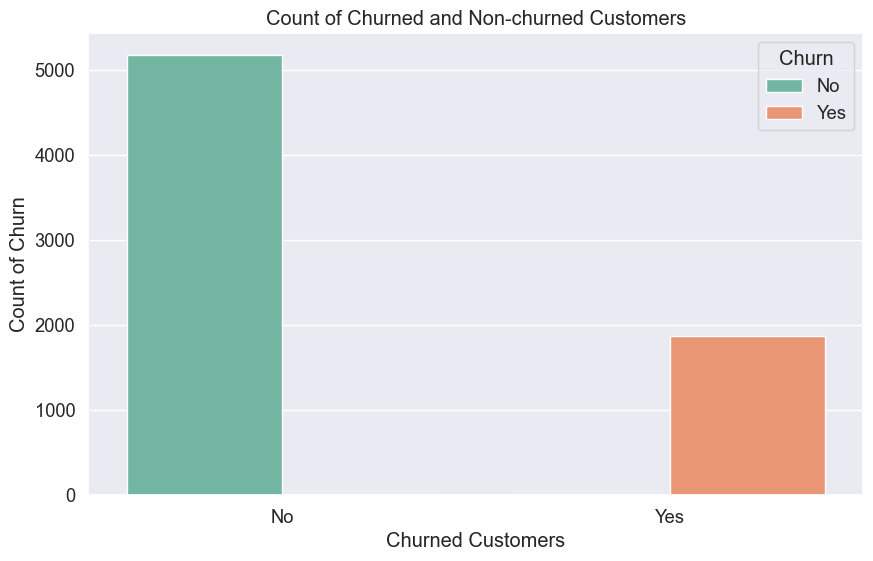

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='Churn', data=telcom, palette='Set2', hue='Churn').set(
    title = 'Count of Churned and Non-churned Customers', xlabel = 'Churned Customers', ylabel = 'Count of Churn')
plt.show()

In [44]:
#Interactive plot for a count of Churned Customers
fig = px.bar(data_frame=telcom_count, x = 'Churn', y = 'Counts', color = 'Churn', title='Distribution of Churned and Non-churned Customers')
fig.update_layout(autosize = False, width = 900, height = 600, xaxis_title = 'Churn', yaxis_title = 'Count of Churn', legend_title = 'Churn')

In [45]:
telcom_contract_count = telcom.groupby(by=['Contract']).size().reset_index(name='Counts')
display(telcom_contract_count)

,Contract,Counts
0,Month-to-month,3875
1,One year,1473
2,Two year,1695


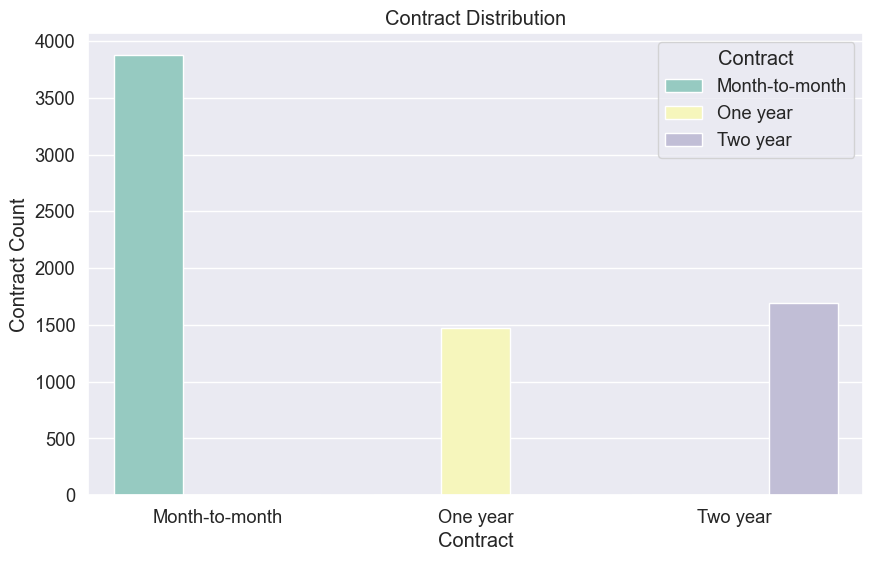

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=telcom, palette='Set3', hue='Contract').set(
    title = 'Contract Distribution', xlabel = 'Contract', ylabel = 'Contract Count')
plt.show()

In [47]:
fig = px.bar(data_frame=telcom_contract_count, x = 'Contract', y = 'Counts', color = 'Contract', title='Distribution of Contracts')
fig.update_layout(autosize = False, width = 900, height = 600, xaxis_title = 'Contract', yaxis_title = 'Count of Contract', legend_title = 'Contract')

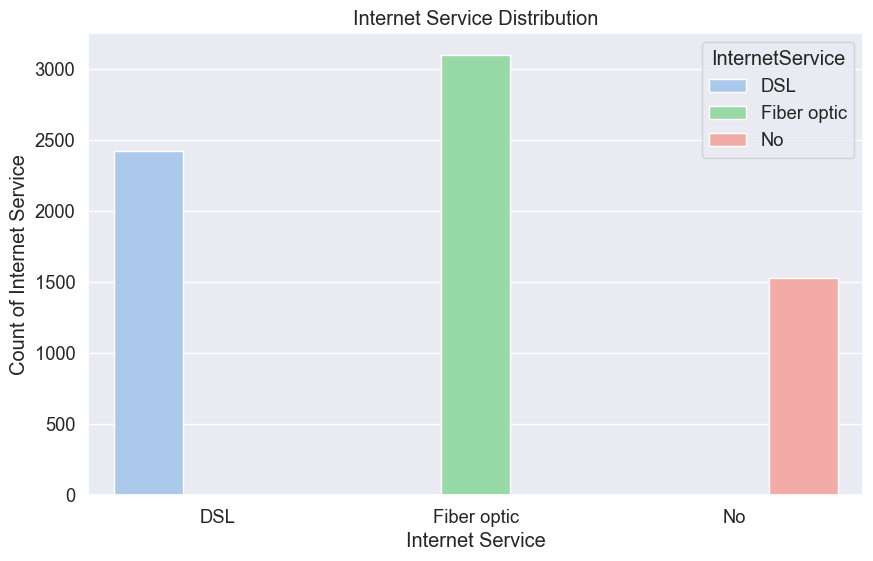

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=telcom, palette=sns.color_palette('pastel6'), hue='InternetService').set(
    title = 'Internet Service Distribution', xlabel = 'Internet Service', ylabel = 'Count of Internet Service')
plt.show()

In [49]:
telcom_internet_count = telcom.groupby(by=['InternetService']).size().reset_index(name='Counts')
display(telcom_internet_count)

,InternetService,Counts
0,DSL,2421
1,Fiber optic,3096
2,No,1526


In [50]:
fig = px.bar(data_frame=telcom_internet_count, x = 'InternetService', y = 'Counts', color = 'InternetService', title='Internet Service Distribution')
fig.update_layout(autosize = False, width = 900, height = 600, xaxis_title = 'Internet Service', yaxis_title = 'Count of Internet Service', legend_title = 'Internet Service')

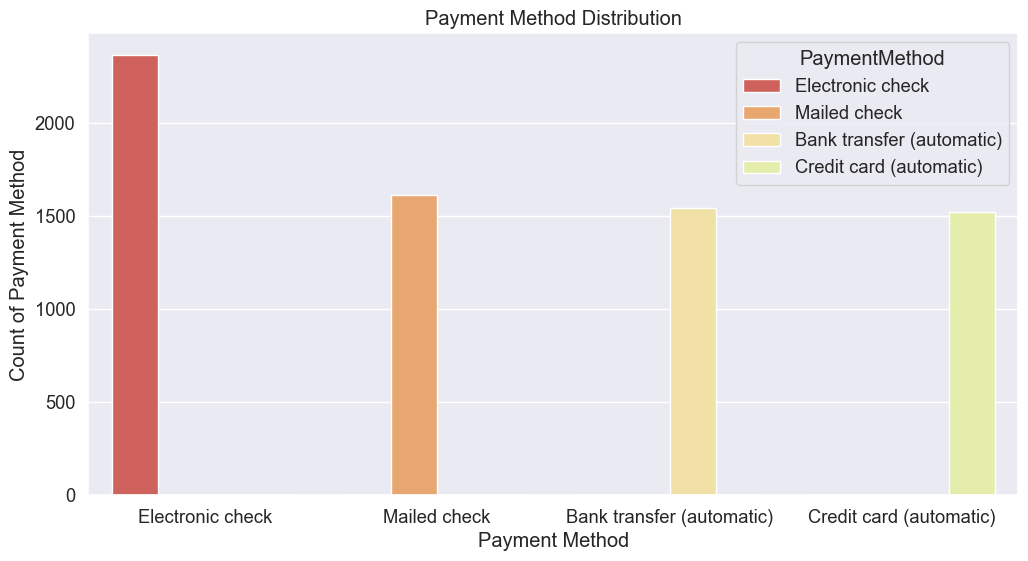

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', data=telcom, palette=sns.color_palette('Spectral'), hue='PaymentMethod').set(
    title = 'Payment Method Distribution', xlabel = 'Payment Method', ylabel = 'Count of Payment Method')
plt.show()

In [52]:
telcom_payment_count = telcom.groupby(by=['PaymentMethod']).size().reset_index(name='Counts')
display(telcom_payment_count)

,PaymentMethod,Counts
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522
2,Electronic check,2365
3,Mailed check,1612


In [53]:
fig = px.bar(data_frame=telcom_payment_count, x = 'PaymentMethod', y = 'Counts', color = 'PaymentMethod', title='PaymentMethod Distribution')
fig.update_layout(autosize = False, width = 1200, height = 600, xaxis_title = 'Payment Method',
                  yaxis_title = 'Count of Payment Method', legend_title = 'Payment Method')

<p><b><h4>It is observed from the plots carried out, that the major cause of churned customers is due to lack of <i>Internet Service</i> within their location</h4></b></p>